## 1. EDA

In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
data_path = "train.csv"

In [4]:
data_raw = pd.read_csv(data_path)
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(159571, 8)

In [5]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8




**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### 1.1. Checking for missing values

In [6]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### 1.2. Calculating number of comments under each label

In [7]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [8]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [9]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [8]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

    #plt.savefig("Categorychart.png", dpi=250, quality=95)
plt.show()


NameError: name 'categories' is not defined

<Figure size 1080x576 with 0 Axes>

### 1.3. Calculating number of comments having multiple labels

In [ ]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

    #plt.savefig("multiplelablecount.png", dpi=250, quality=95)
plt.show()


### 1.4. WordCloud representation of most used words in each category of comments

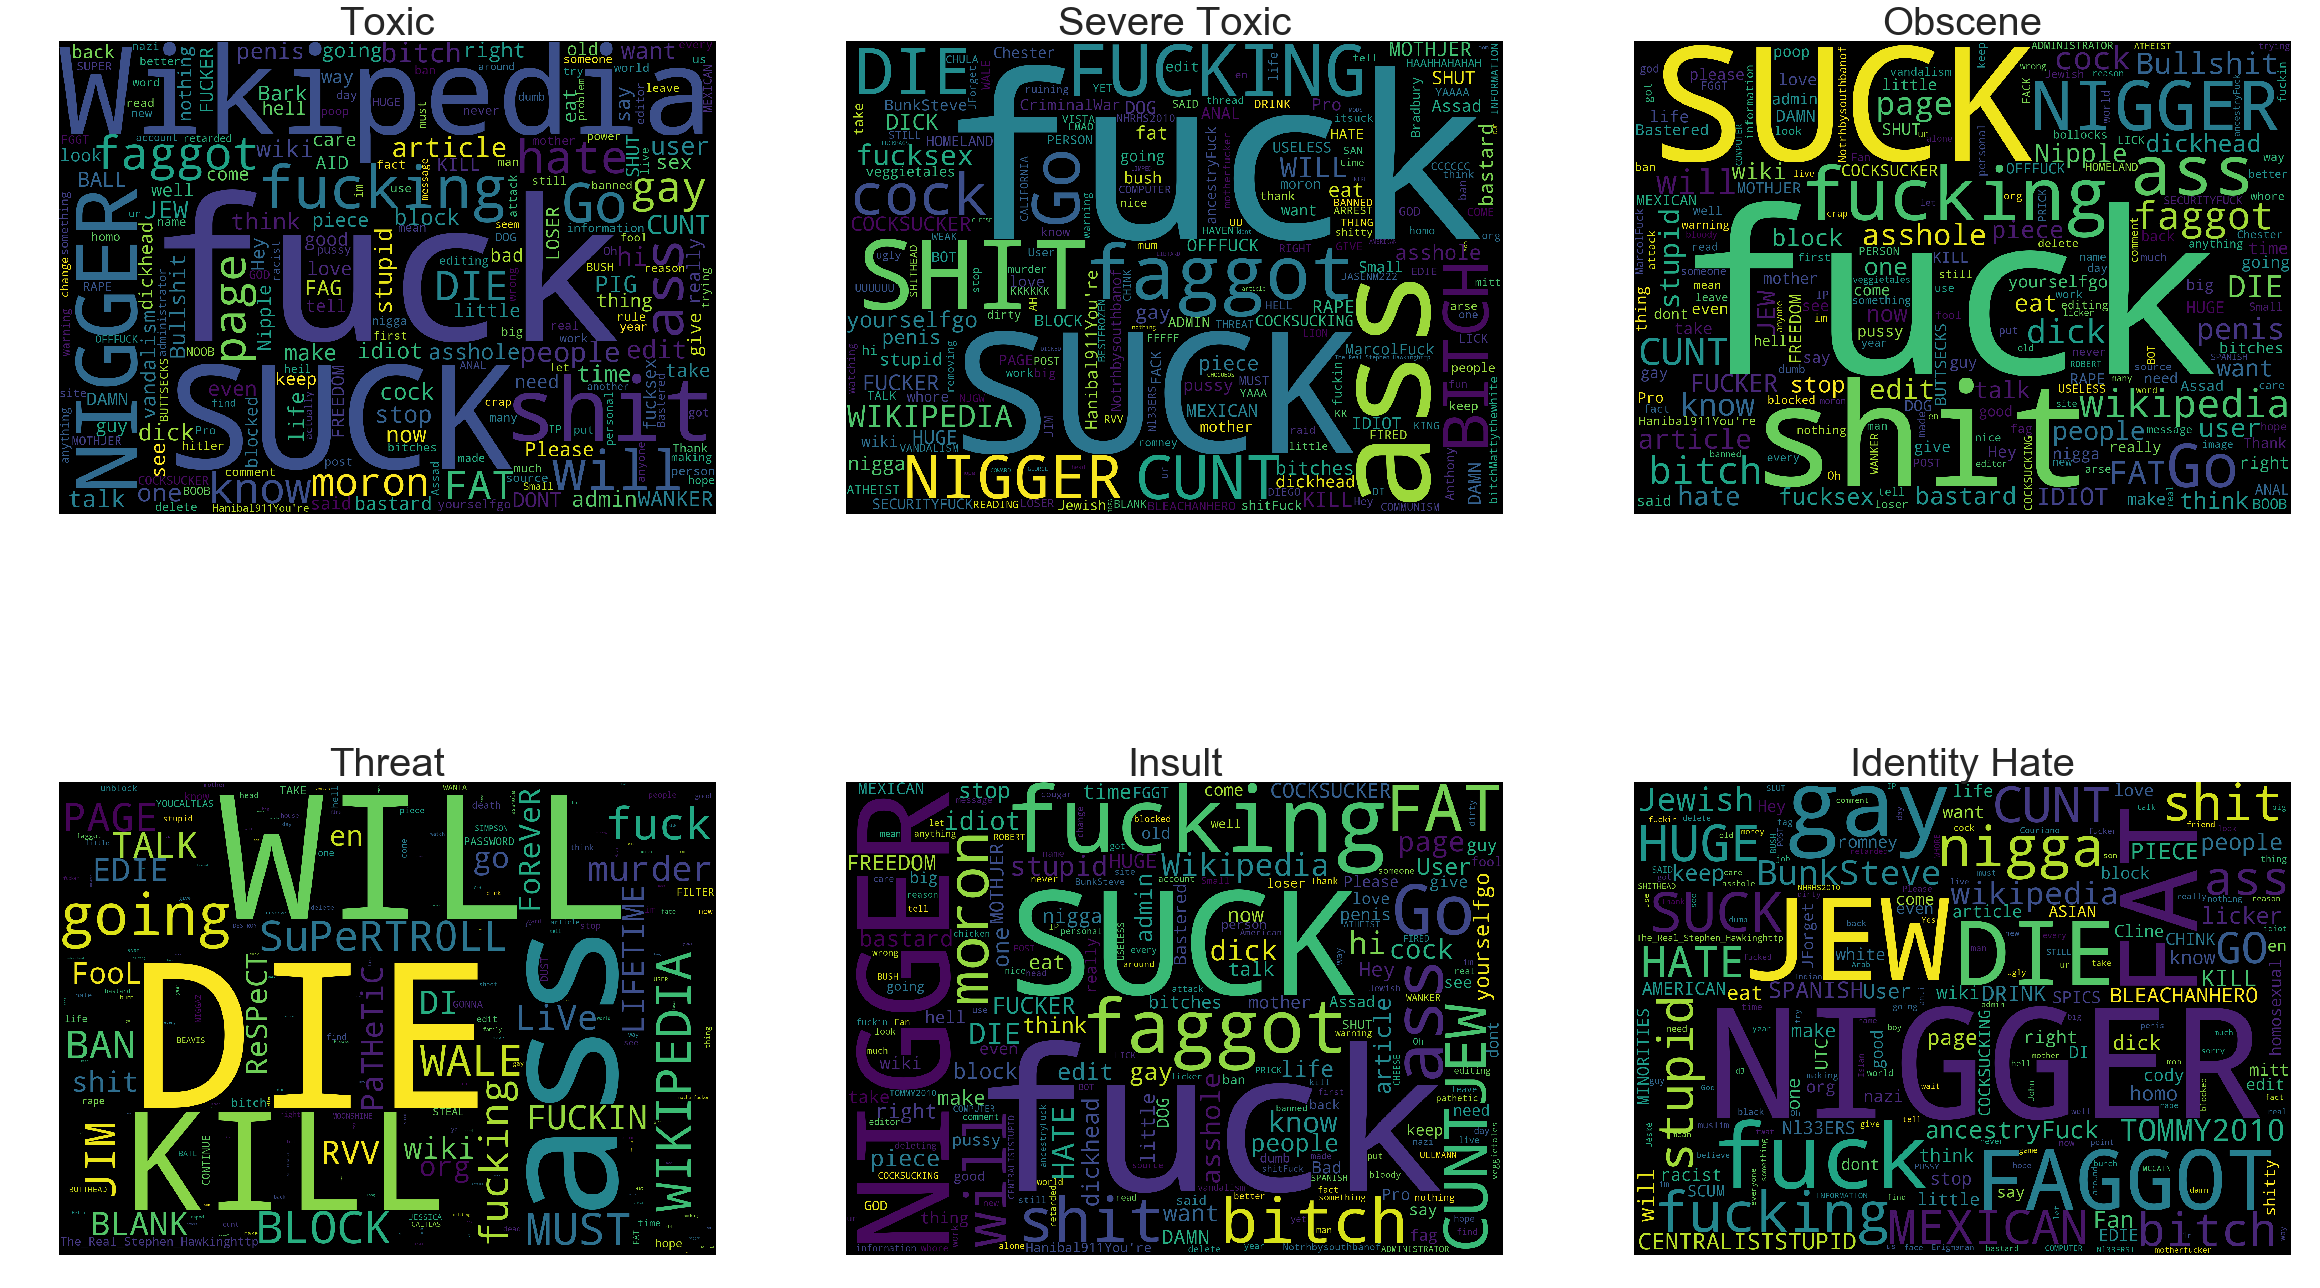

In [9]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

#plt.savefig("wordcloud.png", dpi=250, quality=95)
plt.show()


## 2. Data Pre-Processing

In [13]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### 2.1. Cleaning Data

In [15]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [16]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
108305,42fdb3027a4ca9f5,apart from adding the odd word here and there ...,0,0,0,0,0,0
65705,afbec12bbe7d9fda,no consensus take it to the npov noticeboard a...,0,0,0,0,0,0
137312,deaa002fef0e89c0,actually most of it is quite good there are a ...,0,0,0,0,0,0
48543,81d57be4398b9b1c,requested move dialect levelling dialect lev...,0,0,0,0,0,0
121368,896a0148135147b5,the rewrite is in used a lot of the same conte...,0,0,0,0,0,0


### 2.2. Removing Stop Words

In [17]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
108305,42fdb3027a4ca9f5,apart adding odd word hadnt touched ne...,0,0,0,0,0,0
65705,afbec12bbe7d9fda,consensus take npov noticeboard youll see...,0,0,0,0,0,0
137312,deaa002fef0e89c0,actually quite good errors need fixin...,0,0,0,0,0,0
48543,81d57be4398b9b1c,requested move dialect levelling dialect lev...,0,0,0,0,0,0
121368,896a0148135147b5,rewrite used lot content wikified res...,0,0,0,0,0,0


### 2.3. Stemming

In [18]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
108305,42fdb3027a4ca9f5,apart ad odd word hadnt touch near year,0,0,0,0,0,0
65705,afbec12bbe7d9fda,consensus take npov noticeboard youll see happen,0,0,0,0,0,0
137312,deaa002fef0e89c0,actual quit good error need fix includ critic ...,0,0,0,0,0,0
48543,81d57be4398b9b1c,request move dialect level dialect level brita...,0,0,0,0,0,0
121368,896a0148135147b5,rewrit use lot content wikifi restructur neutr...,0,0,0,0,0,0


# CO-OCCURENCE OF COMMENT TYPES

Each training data has multi-label assignment, meaning, a single training data can be classified into multiple comment types. Let's look at how each comment type is cooccurring in the training dataset. The following Plotly visualizations show the same information in,

Barcharts
A heatmap
The plots here show co-occurrence of comment types per major comment category. So, it makes it easier to look at the co-occurrence information.

In [17]:
import spacy

ModuleNotFoundError: No module named 'spacy'

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# ------------------------ Standard Kaggle statements END --------------------------------------

import spacy
from spacy import __version__
#print("Going to use Spacy version - ", __version__)

from plotly import tools
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
#print("Going to use Plotly version - ", __version__)
init_notebook_mode(connected=True)

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from nltk.corpus import stopwords

# Let's load Spacy
nlp = spacy.load("en")

# Plotly definitions 
# ------------------

# Plot background color
paper_bgcolor = "rgb(240, 240, 240)"
plot_bgcolor = "rgb(240, 240, 240)"

# Red, blue, green (used by plotly by default)
rgb_def = ['rgb(228,26,28)', 'rgb(77,175,74)', 'rgb(55,126,184)']

# Contrasting 2 qualities, highlighting one
contra_2_cols = ["rgb(150,150,150)", "rgb(55,126,184)"]

# Barchart axis templates
# template 1
bchart_xaxis_temp1 = dict(
    zeroline=False,
    showline=False, 
    showgrid=False, 
    showticklabels=False,    
    tickfont=dict(
        size=9,
        color="grey"
    )      
)

bchart_yaxis_temp1=dict(
    tickfont=dict(
        size=9,
        color="grey"
    )        
)

# template 2
bchart_xaxis_temp2 = dict(
    zeroline=False,
    showline=False, 
    showgrid=False, 
    showticklabels=False,    
    tickfont=dict(
        size=10,
        color="grey"
    )      
)

bchart_yaxis_temp2=dict(
    tickfont=dict(
        size=10,
        color="grey"
    )        
)

# Heatmap templates
heatmap_axis_temp1 = dict(
    zeroline=False,
    showline=False,
    showgrid=False, 
    showticklabels=False,  
    ticks=''                
)   

ModuleNotFoundError: No module named 'spacy'

In [ ]:
def concat_label_columns(row):
    multiheads = []
    for col in list(train_orig.columns)[2:]:
        if row[col]:
            multiheads.append(col) 
    if len(multiheads) == 0:
        return "non_toxic"
    else:
        return ":".join(multiheads)
    
def get_reshaped_array(one_d_nparray, fc):
    """Given an 1d array of an arbitrary size, make the shape of the 
    1d array divisible by factor "fc" by appending np.nan values when it is not divisible evenly. 
    For ex: If the array 
    dimension is (114, ), and the factor "fc" is 100,  
    then the np.nan 1d array of shape 86 will 
    be appended to the original 1d array to become array size 200. 
    Array shape 200 evenly divides by 100.
    """    
    remainder = one_d_nparray.shape[0] % fc
    if remainder > 0:
        cells_to_fill = fc - remainder
        nan_array = np.full(cells_to_fill, np.nan)
        one_d_nparray = np.append(one_d_nparray, nan_array)
    num_cols_heatmap = int(one_d_nparray.shape[0] / fc)
    num_rows_heatmap = fc
    return one_d_nparray.reshape((num_rows_heatmap, num_cols_heatmap))

In [ ]:
train_orig = pd.read_csv("train.csv")
test_orig = pd.read_csv("test.csv")

# copy of the datasets 
train = train_orig.copy()
#test = test_orig.copy()

# concatenate the labels into comma separated one label and save it in a new column 
train["concatenated_label"] = train.apply(concat_label_columns, axis=1)

comment_types = list(train_orig.columns)[2:]
comment_types_incl = ["non_toxic"] + comment_types

multi_comment_types = list(train["concatenated_label"].unique())

In [ ]:
cmnt_count_matrix = []
for cmnt_type1 in comment_types:
    cmnt_type_frame = train[train[cmnt_type1] == 1]
    cmnt_type2_count = []
    for cmnt_type2 in comment_types:
        cmnt_type2_count.append(cmnt_type_frame[cmnt_type2].sum())
    cmnt_count_matrix.append(cmnt_type2_count)
cmnt_count_matrix = np.array(cmnt_count_matrix)

fig_coords = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
axes_names = [("x1", "y1"), ("x2", "y2"), ("x3", "y3"), ("x4", "y4"), ("x5", "y5"), ("x6", "y6")]
axes_lo_names = [("xaxis1", "yaxis1"), ("xaxis2", "yaxis2"), ("xaxis3", "yaxis3"), ("xaxis4", "yaxis4"), ("xaxis5", "yaxis5"), ("xaxis6", "yaxis6")]
fig = tools.make_subplots(
    rows=2, 
    cols=3, 
    horizontal_spacing=0.15, 
    vertical_spacing=0.25,
    subplot_titles=(comment_types[0], comment_types[1], comment_types[2], comment_types[3], comment_types[4], comment_types[5])
)
for i, c_type, fig_coord, ax in zip(range(len(comment_types)),comment_types, fig_coords, axes_names):
    inner_count = pd.Series(cmnt_count_matrix[i, :], index=comment_types)
    inner_count = inner_count.sort_values()
    trace = go.Bar(x=inner_count, y=list(inner_count.index), orientation = 'h')
    fig.append_trace(trace, fig_coord[0], fig_coord[1])

fig["layout"].update(
    showlegend=False,
    title="<b>Co-occurrence of comment types</b>",
    xaxis1=bchart_xaxis_temp2,
    yaxis1=bchart_yaxis_temp2,
    xaxis2=bchart_xaxis_temp2,
    yaxis2=bchart_yaxis_temp2,
    xaxis3=bchart_xaxis_temp2,
    yaxis3=bchart_yaxis_temp2,    
    xaxis4=bchart_xaxis_temp2,
    yaxis4=bchart_yaxis_temp2,
    xaxis5=bchart_xaxis_temp2,
    yaxis5=bchart_yaxis_temp2,
    xaxis6=bchart_xaxis_temp2,
    yaxis6=bchart_yaxis_temp2,

    margin=go.Margin(
        l=100,
        r=100,
        t=100,
        b=25,
    ),
    autosize=False,
    width=900,
    height=500,
)
iplot(fig)

# As a heatmap
fig = ff.create_annotated_heatmap(
    z=cmnt_count_matrix, 
    x=comment_types, 
    y=comment_types, 
    colorscale='YlGnBu', 
    zmin=1, 
    zmax=cmnt_count_matrix.max()
)
fig["layout"]["xaxis"].update(side="bottom")
fig["layout"].update(
    title="<b>Co-occurrence of comment types</b>",    
    xaxis=dict(
        title="Major comment category",
        tickfont=dict(
            color="grey"
        )        
    ),   
    yaxis=dict(
        title="Co-occurring comment category",
        tickfont=dict(
            color="grey"
        )        
    ),   
    
    margin=go.Margin(
        l=150,
        r=150,
        t=150,
        b=75
    ),
    autosize=False,
    width=900,
    height=450,
)
iplot(fig)